In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"C:\Users\Milind\Desktop\Analytics\dataset bankcamp.csv")

In [4]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [5]:
df.describe()

,age,call_day,call_duration,call_frequency
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


In [6]:
df.call_duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: call_duration, dtype: float64

In [7]:
df.conversion_status.value_counts()

conversion_status
not_converted    39922
converted         5289
Name: count, dtype: int64

In [8]:
df.occupation.value_counts()

occupation
manual_worker           9732
executive               9458
technical_specialist    7597
administrative_staff    5171
service_worker          4154
retired_worker          2264
independent_worker      1579
business_owner          1487
jobless                 1303
domestic_worker         1240
student                  938
unidentified             288
Name: count, dtype: int64

In [9]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [10]:
pd.crosstab(index=df["occupation"], columns = df["conversion_status"])

conversion_status,converted,not_converted
occupation,,
administrative_staff,631,4540
business_owner,123,1364
domestic_worker,109,1131
executive,1301,8157
independent_worker,187,1392
jobless,202,1101
manual_worker,708,9024
retired_worker,516,1748
service_worker,369,3785


In [11]:
df["Age Group"] = pd.cut(df["age"], bins=5, labels=["18-30", "31-55", "55-70", "70-90", "90-More"])

In [12]:
df.groupby('occupation')['Age Group'].value_counts()

occupation            Age Group
administrative_staff  31-55        2474
                      18-30        1690
                      55-70         995
                      70-90          12
                      90-More         0
business_owner        31-55         783
                      55-70         410
                      18-30         288
                      70-90           5
                      90-More         1
domestic_worker       31-55         529
                      55-70         522
                      18-30         159
                      70-90          22
                      90-More         8
executive             31-55        4640
                      18-30        2686
                      55-70        2090
                      70-90          40
                      90-More         2
independent_worker    31-55         759
                      18-30         447
                      55-70         365
                      70-90           8
        

In [13]:
pd.crosstab(index=df["occupation"], columns = df["Age Group"])

Age Group,18-30,31-55,55-70,70-90,90-More
occupation,,,,,
administrative_staff,1690,2474,995,12,0
business_owner,288,783,410,5,1
domestic_worker,159,529,522,22,8
executive,2686,4640,2090,40,2
independent_worker,447,759,365,8,0
jobless,352,627,320,4,0
manual_worker,2688,5085,1953,6,0
retired_worker,6,112,1471,557,118
service_worker,1445,1980,728,1,0


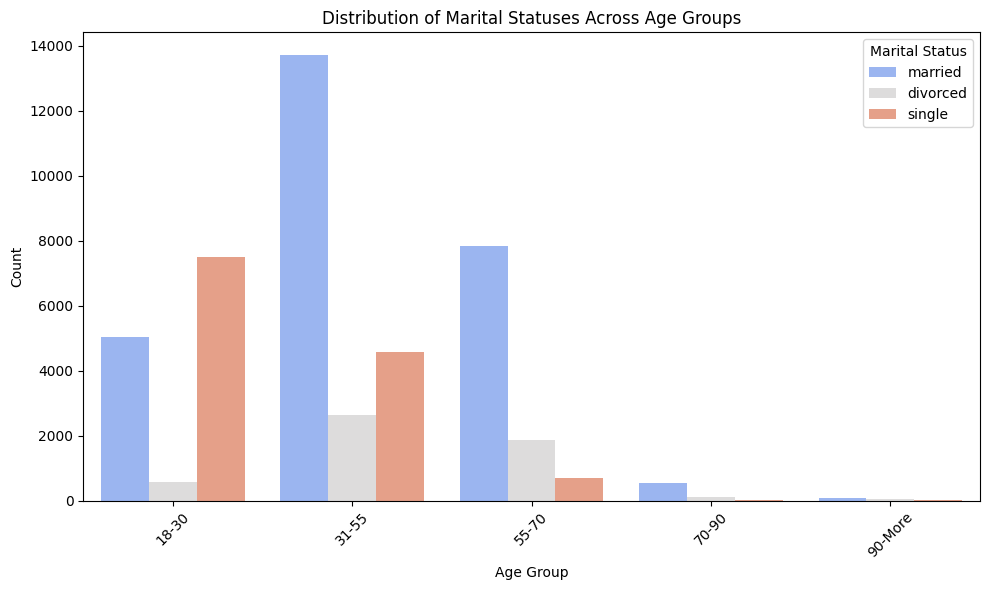

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Age Group', hue='marital_status', data=df, palette='coolwarm')
plt.title('Distribution of Marital Statuses Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Marital Status')
plt.tight_layout()
plt.show()

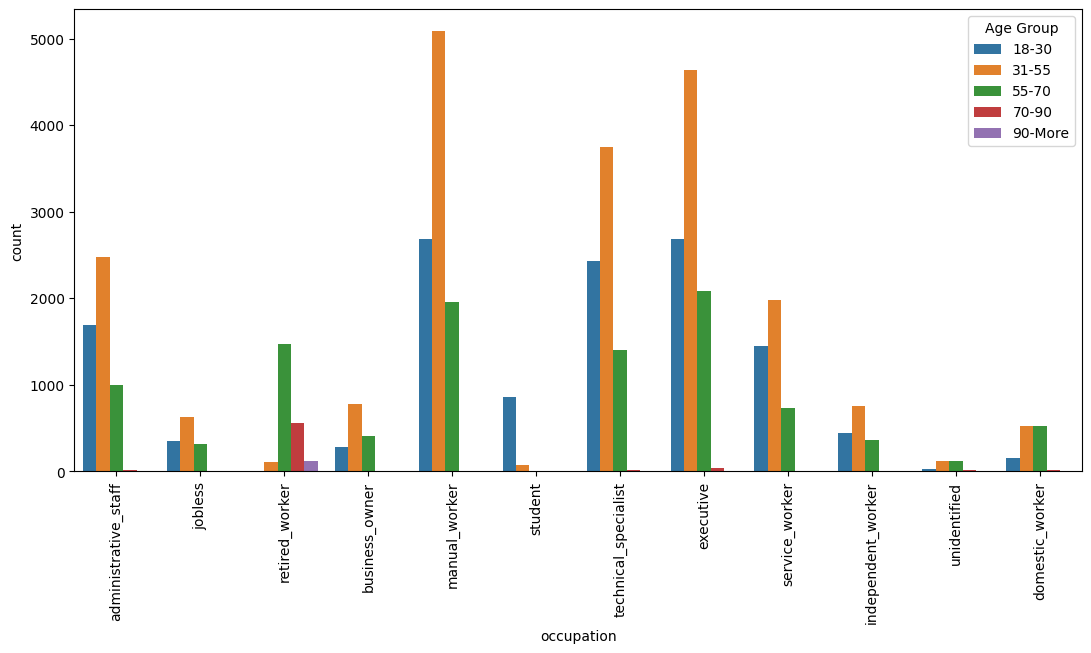

In [15]:
#sns.barplot(x=occupation.index, y=Age Group.values, hue=occupation.index)
plt.figure(figsize=(13,6))
sns.countplot(df,x='occupation', hue='Age Group')
plt.xticks(rotation=90)
plt.show()

In [16]:
df = df.drop(columns='Age Group')
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [17]:
pd.crosstab(index=df["education_level"], columns = df["conversion_status"])

conversion_status,converted,not_converted
education_level,,
college,1996,11305
elementary_school,591,6260
high_school,2450,20752
unidentified,252,1605


<Axes: xlabel='conversion_status', ylabel='count'>

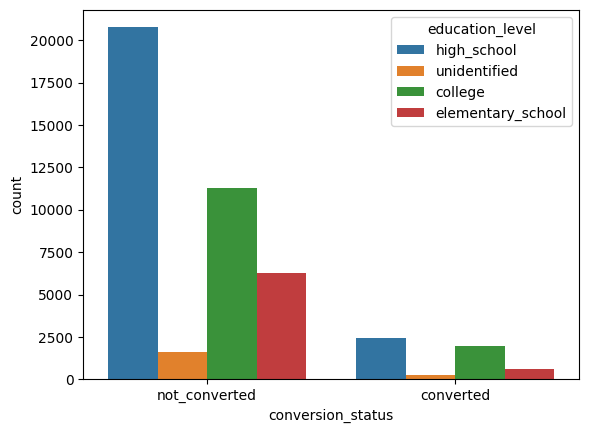

In [18]:
sns.countplot(df, x='conversion_status',hue='education_level' )

In [19]:
pd.crosstab(index=df['marital_status'], columns=df['communication_channel'])

communication_channel,landline,mobile,unidentified
marital_status,,,
divorced,271,3326,1610
married,2015,17168,8031
single,620,8791,3379


<Axes: xlabel='marital_status', ylabel='count'>

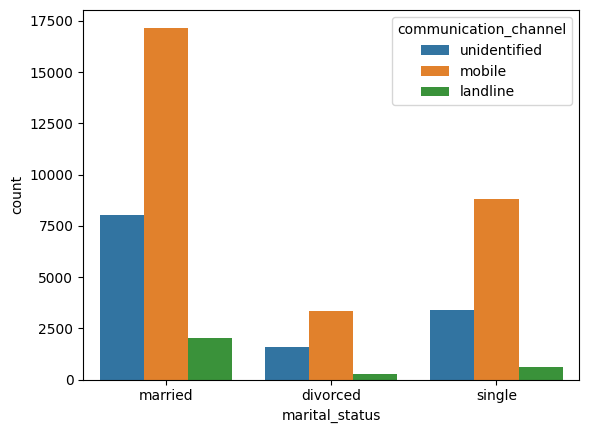

In [20]:
sns.countplot(df, x='marital_status', hue='communication_channel')

In [21]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [22]:
np.round(pd.pivot_table(df,index='call_month', columns='call_day', values='call_duration', fill_value=0)).T

call_month,April,August,December,February,January,July,June,March,May,November,October,September
call_day,,,,,,,,,,,,
1,375.0,11.0,0.0,291.0,0.0,280.0,266.0,35.0,0.0,0.0,217.0,283.0
2,385.0,289.0,323.0,243.0,0.0,264.0,238.0,258.0,0.0,151.0,293.0,292.0
3,328.0,375.0,352.0,258.0,0.0,283.0,265.0,264.0,0.0,310.0,0.0,332.0
4,0.0,270.0,375.0,263.0,0.0,262.0,250.0,282.0,265.0,196.0,8.0,272.0
5,386.0,306.0,152.0,267.0,0.0,133.0,264.0,172.0,270.0,231.0,7.0,12.0
6,375.0,286.0,0.0,235.0,66.0,250.0,234.0,210.0,260.0,222.0,387.0,254.0
7,298.0,235.0,302.0,0.0,81.0,269.0,103.0,0.0,281.0,0.0,295.0,295.0
8,330.0,222.0,170.0,270.0,213.0,284.0,190.0,247.0,242.0,225.0,267.0,291.0
9,288.0,238.0,313.0,173.0,0.0,255.0,247.0,255.0,258.0,276.0,462.0,353.0


In [23]:
pd.crosstab( index=df['call_month'], columns=df['call_day'], values=df['call_duration'], aggfunc='sum').T

call_month,April,August,December,February,January,July,June,March,May,November,October,September
call_day,,,,,,,,,,,,
1,17603.0,11.0,NaN,2620.0,NaN,20474.0,28155.0,70.0,NaN,NaN,7168.0,14433.0
2,19267.0,7217.0,1615.0,125879.0,NaN,19500.0,121634.0,12360.0,NaN,4670.0,2342.0,7007.0
3,20352.0,6006.0,4570.0,88744.0,NaN,28549.0,121257.0,7646.0,NaN,6811.0,NaN,11607.0
4,NaN,62017.0,6746.0,121791.0,NaN,23833.0,82905.0,4227.0,63961.0,3927.0,46.0,8160.0
5,7341.0,74781.0,303.0,117899.0,NaN,933.0,113709.0,7415.0,190105.0,3228.0,20.0,24.0
6,27020.0,87111.0,NaN,56533.0,132.0,4497.0,93300.0,1260.0,213600.0,2669.0,11599.0,7107.0
7,25022.0,82833.0,7844.0,NaN,324.0,104490.0,515.0,NaN,250702.0,NaN,6491.0,12666.0
8,36319.0,72893.0,170.0,5933.0,1064.0,113644.0,5505.0,3457.0,203828.0,4055.0,8796.0,11916.0
9,24770.0,3090.0,6261.0,36705.0,NaN,88945.0,85827.0,5614.0,110877.0,9929.0,1386.0,15514.0


In [24]:
pd.crosstab(index=df['conversion_status'], columns=df['previous_campaign_outcome'])

previous_campaign_outcome,other_outcome,successful,unidentified,unsuccessful
conversion_status,,,,
converted,307,978,3386,618
not_converted,1533,533,33573,4283


<Axes: xlabel='conversion_status', ylabel='count'>

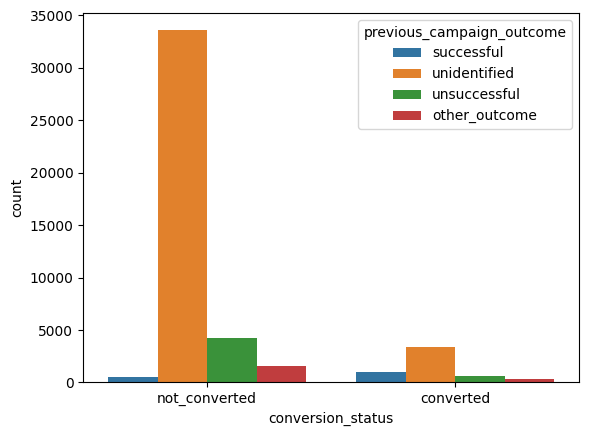

In [25]:
sns.countplot(df,x='conversion_status', hue='previous_campaign_outcome')

In [26]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,not_converted
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,not_converted


In [27]:
df.occupation.value_counts() ## pd.get_dummies

occupation
manual_worker           9732
executive               9458
technical_specialist    7597
administrative_staff    5171
service_worker          4154
retired_worker          2264
independent_worker      1579
business_owner          1487
jobless                 1303
domestic_worker         1240
student                  938
unidentified             288
Name: count, dtype: int64

In [28]:
occ = pd.get_dummies(df,columns=['occupation'],dtype='int', drop_first=True)

In [29]:
df = pd.concat([df['occupation'], occ], axis=1 )

In [30]:
df.head()

,occupation,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,...,occupation_domestic_worker,occupation_executive,occupation_independent_worker,occupation_jobless,occupation_manual_worker,occupation_retired_worker,occupation_service_worker,occupation_student,occupation_technical_specialist,occupation_unidentified
0,administrative_staff,28,high_school,married,unidentified,September,9,1,1,successful,...,0,0,0,0,0,0,0,0,0,0
1,administrative_staff,58,unidentified,married,unidentified,June,5,307,2,unidentified,...,0,0,0,0,0,0,0,0,0,0
2,jobless,40,high_school,divorced,mobile,February,4,113,1,unidentified,...,0,0,0,1,0,0,0,0,0,0
3,retired_worker,63,high_school,married,mobile,April,7,72,5,unidentified,...,0,0,0,0,0,1,0,0,0,0
4,business_owner,43,college,married,landline,July,29,184,4,unidentified,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.drop('occupation', axis=1, inplace=True)

In [32]:
df.head()

,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,...,occupation_domestic_worker,occupation_executive,occupation_independent_worker,occupation_jobless,occupation_manual_worker,occupation_retired_worker,occupation_service_worker,occupation_student,occupation_technical_specialist,occupation_unidentified
0,28,high_school,married,unidentified,September,9,1,1,successful,not_converted,...,0,0,0,0,0,0,0,0,0,0
1,58,unidentified,married,unidentified,June,5,307,2,unidentified,not_converted,...,0,0,0,0,0,0,0,0,0,0
2,40,high_school,divorced,mobile,February,4,113,1,unidentified,not_converted,...,0,0,0,1,0,0,0,0,0,0
3,63,high_school,married,mobile,April,7,72,5,unidentified,not_converted,...,0,0,0,0,0,1,0,0,0,0
4,43,college,married,landline,July,29,184,4,unidentified,not_converted,...,0,0,0,0,0,0,0,0,0,0


In [33]:
from sklearn.preprocessing import OrdinalEncoder

In [34]:
enc = OrdinalEncoder()
df['education_level'] = enc.fit_transform(df[["education_level"]])

In [35]:
df.head()

,age,education_level,marital_status,communication_channel,call_month,call_day,call_duration,call_frequency,previous_campaign_outcome,conversion_status,...,occupation_domestic_worker,occupation_executive,occupation_independent_worker,occupation_jobless,occupation_manual_worker,occupation_retired_worker,occupation_service_worker,occupation_student,occupation_technical_specialist,occupation_unidentified
0,28,2.0,married,unidentified,September,9,1,1,successful,not_converted,...,0,0,0,0,0,0,0,0,0,0
1,58,3.0,married,unidentified,June,5,307,2,unidentified,not_converted,...,0,0,0,0,0,0,0,0,0,0
2,40,2.0,divorced,mobile,February,4,113,1,unidentified,not_converted,...,0,0,0,1,0,0,0,0,0,0
3,63,2.0,married,mobile,April,7,72,5,unidentified,not_converted,...,0,0,0,0,0,1,0,0,0,0
4,43,0.0,married,landline,July,29,184,4,unidentified,not_converted,...,0,0,0,0,0,0,0,0,0,0


In [36]:
df.education_level.value_counts() # ordinal Encoder # Lambda

education_level
2.0    23202
0.0    13301
1.0     6851
3.0     1857
Name: count, dtype: int64

In [37]:
df.marital_status.value_counts() #lambda

marital_status
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

In [38]:
df['marital_status']=list(map(lambda x: 0 if x=='married' else(1 if x=='single' else 2), df['marital_status']))

In [39]:
df.communication_channel.value_counts() #Lambda

communication_channel
mobile          29285
unidentified    13020
landline         2906
Name: count, dtype: int64

In [40]:
df['communication_channel']=list(map(lambda x: 0 if x=='mobile' else(1 if x=='unidentified' else 2), df['communication_channel']))

In [41]:
df.call_month.value_counts() # label

call_month
May          13766
July          6895
August        6247
June          5341
November      3970
April         2932
February      2649
January       1403
October        738
September      579
March          477
December       214
Name: count, dtype: int64

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
model = LabelEncoder()

In [44]:
model.fit_transform(df['call_month'])

array([11,  6,  3, ...,  6,  5,  8])

In [45]:
df['call_month']= model.fit_transform(df['call_month']) 
df['call_month'].unique()

array([11,  6,  3,  0,  5,  1,  9,  8,  4, 10,  7,  2])

In [46]:
df.previous_campaign_outcome.value_counts() #label

previous_campaign_outcome
unidentified     36959
unsuccessful      4901
other_outcome     1840
successful        1511
Name: count, dtype: int64

In [47]:
model.fit_transform(df['previous_campaign_outcome'])

array([1, 2, 2, ..., 0, 2, 2])

In [48]:
df['previous_campaign_outcome']

0           successful
1         unidentified
2         unidentified
3         unidentified
4         unidentified
             ...      
45206     unsuccessful
45207     unidentified
45208    other_outcome
45209     unidentified
45210     unidentified
Name: previous_campaign_outcome, Length: 45211, dtype: object

In [49]:
df['previous_campaign_outcome'] = model.fit_transform(df['previous_campaign_outcome'])

In [50]:
X = df.drop('conversion_status', axis=1)
y = df['conversion_status']

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train , X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=98)

In [53]:
X_train.shape

(33908, 20)

In [54]:
X_test.shape

(11303, 20)

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC

In [56]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8752543572502876
Precision: 0.8795327048896046
Recall: 0.8752543572502876
F1-score: 0.8773016380372289


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_features=3)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.9087852782447138
Precision: 0.8961515742768088
Recall: 0.9087852782447138
F1-score: 0.8981451633669041


In [58]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()

dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8749004689020614
Precision: 0.8777023050948406
Recall: 0.8749004689020614
F1-score: 0.876262033706163


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()

gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Gradient Boosting Classifier:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Gradient Boosting Classifier:
Accuracy: 0.9075466690259223
Precision: 0.894760131389683
Recall: 0.9075466690259223
F1-score: 0.8971916598444248


In [60]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier

classifier1 = GradientBoostingClassifier()
classifier2 = AdaBoostClassifier()
classifier3 = RandomForestClassifier()

voting_classifier = VotingClassifier(estimators=[
    ('gb', classifier1),
    ('ab', classifier2),
    ('rf', classifier3)
], voting='hard')  

voting_classifier.fit(X_train, y_train)

accuracy = voting_classifier.score(X_test, y_test)
print("Voting Classifier Accuracy:", accuracy)

Voting Classifier Accuracy: 0.9086968061576572


In [61]:
base_estimators = [
    ("svc", SVC(kernel="rbf")),
                   ("dt", DecisionTreeClassifier(criterion="entropy", max_depth=5)),
                    ("logreg", LogisticRegression())
]

model = SVC(kernel="rbf")

sc = StackingClassifier(estimators=base_estimators, final_estimator=model, cv=5,
                       n_jobs=-1, verbose=1)

sc.fit(X_train, y_train)
y_pred = sc.predict(X_test)
accuracy_training = sc.score(X_train, y_train)
accuracy_score = accuracy_score(y_test, y_pred)
print("sc Classifier Accuracy Training:", accuracy_training)
print("sc Classifier Accuracy Score:", accuracy_score)

sc Classifier Accuracy Training: 0.9005839329951634
sc Classifier Accuracy Score: 0.9058656993718481


In [62]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

base_estimators = [
    ('gb', GradientBoostingClassifier()),
    ('rf', RandomForestClassifier()),
    ('dt', AdaBoostClassifier())
]

meta_classifier = LogisticRegression()

stacking_classifier = StackingClassifier(estimators=base_estimators, final_estimator=meta_classifier)

stacking_classifier.fit(X_train, y_train)
y_pred = stacking_classifier.predict(X_test)  # Corrected variable name
accuracy_training = stacking_classifier.score(X_train, y_train)
accuracy = accuracy_score(y_test, y_pred)

print("Stacking Classifier Accuracy Training:", accuracy_training)
print("Stacking Classifier Accuracy:", accuracy)

Stacking Classifier Accuracy Training: 0.9709802996343045
Stacking Classifier Accuracy: 0.9092276386799965
